In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
data = pd.read_csv("MP1_Data_conv.csv", index_col="element")
print(data)

         node_1  node_2   i   j   k
element                            
1             1       2  36   0   0
2             1       4  36  18 -48
3             2       3 -36  18 -48
4             1       5  36 -18 -48
5             2       6 -36 -18 -48
6             2       4   0  18 -48
7             2       5   0 -18 -48
8             1       3   0  18 -48
9             1       6   0 -18 -48
10            3       6   0 -36   0
11            4       5   0 -36   0
12            3       4  36   0   0
13            5       6 -36   0   0
14            3      10 -30 -66 -48
15            6       7 -30  66 -48
16            4       9  30 -66 -48
17            5       8  30  66 -48
18            4       7 -66  30 -48
19            3       8  66  30 -48
20            5      10 -66 -30 -48
21            6       9  66 -30 -48
22            6      10 -30 -30 -48
23            3       7 -30  30 -48
24            4       8  30  30 -48
25            5       9  30 -30 -48


In [3]:
E=3e7                  # Young's modulus
A=np.pi                # Cross-Sectional Area
poisson = 0.3          # Poisson's ratio
mass_density = 7.3e-4

In [4]:
data['theta_x']=np.arccos(data['i']/(data['i']**2 + data['j']**2 + data['k']**2 )**0.5)
data['theta_y']=np.arccos(data['j']/(data['i']**2 + data['j']**2 + data['k']**2 )**0.5)
data['theta_z']=np.arccos(data['k']/(data['i']**2 + data['j']**2 + data['k']**2 )**0.5)
data['length']=(data['i']**2 + data['j']**2 + data['k']**2)**0.5
data['mass']=data['length']*np.pi*mass_density
print(data)

         node_1  node_2   i   j   k   theta_x   theta_y   theta_z     length  \
element                                                                        
1             1       2  36   0   0  0.000000  1.570796  1.570796  36.000000   
2             1       4  36  18 -48  0.958564  1.279340  2.443798  62.641839   
3             2       3 -36  18 -48  2.183029  1.279340  2.443798  62.641839   
4             1       5  36 -18 -48  0.958564  1.862253  2.443798  62.641839   
5             2       6 -36 -18 -48  2.183029  1.862253  2.443798  62.641839   
6             2       4   0  18 -48  1.570796  1.212026  2.782822  51.264022   
7             2       5   0 -18 -48  1.570796  1.929567  2.782822  51.264022   
8             1       3   0  18 -48  1.570796  1.212026  2.782822  51.264022   
9             1       6   0 -18 -48  1.570796  1.929567  2.782822  51.264022   
10            3       6   0 -36   0  1.570796  3.141593  1.570796  36.000000   
11            4       5   0 -36   0  1.5

In [5]:
def localK(element):
    _,_,_,_,_,theta_x,theta_y,theta_z,L,_ = data.loc[element].values.tolist()
    l=np.cos(theta_x)
    m=np.cos(theta_y)
    n=np.cos(theta_z)
    trans = np.array([[l**2, l*m, l*n, -1*(l**2), -1*(l*m), -1*(l*n)],
                      [l*m, m**2, m*n, -1*(l*m), -1*(m**2), -1*(n*m)],
                      [l*n, m*n, n**2, -1*(l*n), -1*(n*m), -1*(n**2)],
                      [-1*(l**2), -1*(l*m), -1*(l*n), l**2, l*m, l*n],
                      [-1*(l*m), -1*(m**2), -1*(m*n), l*m, m**2, n*m],
                      [-1*(l*n), -1*(m*n), -1*(n**2), l*n, n*m, n**2]])
    trans[abs(trans)<0.01]=0
    k=np.dot(((E*A)/(L*(1+2*(poisson**2)))), trans)
    
    return k

In [6]:
def globalK():
    gk=np.zeros([30,30])
    for element in range(1,26):
        node_1,node_2,_,_,_,_,_,_,_,_ = data.loc[element].values.tolist()
        node_1=int(node_1)
        node_2=int(node_2)
        lk = localK(element)
        for i in range(3):
            for j in range(3):
                gk[(node_1-1)*3+i][(node_1-1)*3+j] += lk[i][j]
                gk[(node_1-1)*3+i][(node_2-1)*3+j] += lk[i][j+3]
                gk[(node_2-1)*3+i][(node_1-1)*3+j] += lk[i+3][j]
                gk[(node_2-1)*3+i][(node_2-1)*3+j] += lk[i+3][j+3]
        
    return gk

In [7]:
print(globalK())

[[ 3.06086871e+06 -8.73114914e-11 -1.12297311e+06 -2.21863888e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.21114915e+05 -2.10557458e+05  5.61486553e+05
  -4.21114915e+05  2.10557458e+05  5.61486553e+05  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.73114914e-11  5.94729790e+05 -5.82076609e-11  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.92086166e+05
   5.12229777e+05 -2.10557458e+05 -1.05278729e+05  2.80743277e+05
   2.10557458e+05 -1.05278729e+05 -2.80743277e+05  0.00000000e+00
  -1.92086166e+05 -5.12229777e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.1

In [8]:
# We need to eliminate rows and columns for nodes 7,8,9 and 10
K=globalK()
for i in range(18,30):
    K = np.delete(K, [18], 0)
    K = np.delete(K, [18], 1)

In [9]:
#Given F
F=np.zeros([18,1])
F[1]=F[4]=60000

#Forces due to weight
F[2]=F[5]=  -1*data.iloc[0:1]['mass'].sum()*9.81/2
F[8]=F[11]=F[14]=F[17]= -1*data.iloc[0:13]['mass'].sum()*9.81/4
print(F)

[[ 0.00000000e+00]
 [ 6.00000000e+04]
 [-4.04961974e-01]
 [ 0.00000000e+00]
 [ 6.00000000e+04]
 [-4.04961974e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.57504619e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.57504619e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.57504619e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.57504619e+00]]


In [10]:
U = np.dot(np.linalg.inv(K), F)
print(U)

[[-3.46526641e-08]
 [ 2.80241767e-01]
 [-3.06989153e-06]
 [ 3.46526640e-08]
 [ 2.80241767e-01]
 [-3.06989153e-06]
 [-2.04015255e-03]
 [ 1.84409105e-02]
 [-5.98042593e-02]
 [ 2.04015255e-03]
 [ 1.84409105e-02]
 [-5.98042593e-02]
 [-2.04039182e-03]
 [ 1.84411502e-02]
 [ 5.97981760e-02]
 [ 2.04039182e-03]
 [ 1.84411502e-02]
 [ 5.97981760e-02]]


In [68]:
def stres(elem):
    node_1,node_2,_,_,_,theta_x,theta_y,theta_z,L,_ = data.loc[elem].values.tolist()
    l=np.cos(theta_x)
    m=np.cos(theta_y)
    n=np.cos(theta_z)
    node_1 = int(node_1)
    node_2 = int(node_2)
    transform = np.array([l, m, n, -1*l, -1*m, -1*n])
    
    newU=np.zeros([30,1])
    for i in range(18):
        newU[i]=U[i]
    
    localU = np.array([newU[3*(node_1-1)+0],
                      newU[3*(node_1-1)+1],
                      newU[3*(node_1-1)+2],
                      newU[3*(node_2-1)+0],
                      newU[3*(node_2-1)+1],
                      newU[3*(node_2-1)+2]])

    stress=np.dot((E/(L*(1+2*(poisson**2)))), np.dot(transform, localU))
    return stress

In [69]:
#Table of stress
stress = np.zeros([25,1])
for i in range(25):
    stress[i]=stres(i+1)

In [70]:
print(stress)

[[-4.89444407e-02]
 [ 1.14582465e+04]
 [ 1.14582465e+04]
 [-1.14581613e+04]
 [-1.14581613e+04]
 [ 1.78194251e+04]
 [-1.78193571e+04]
 [ 1.78194251e+04]
 [-1.78193571e+04]
 [ 1.69217383e-01]
 [ 1.69217383e-01]
 [-2.88157140e+03]
 [ 2.88190935e+03]
 [ 5.76644111e+03]
 [-5.76543010e+03]
 [ 5.76644111e+03]
 [-5.76543010e+03]
 [ 1.10612782e+04]
 [ 1.10612782e+04]
 [-1.10602673e+04]
 [-1.10602673e+04]
 [-2.15876122e+04]
 [ 2.15893321e+04]
 [ 2.15893321e+04]
 [-2.15876122e+04]]


In [11]:
#ploting original
nodes_coords=np.zeros([10,3])
done=[1]
for element in range(1,26):
    a,b,i,j,k,_,_,_,_,_ = data.loc[element].values.tolist()
    if b not in done and a in done:
        nodes_coords[int(b)-1]=nodes_coords[int(a)-1]+[i,j,k]
        done.append(b)

<IPython.core.display.Javascript object>


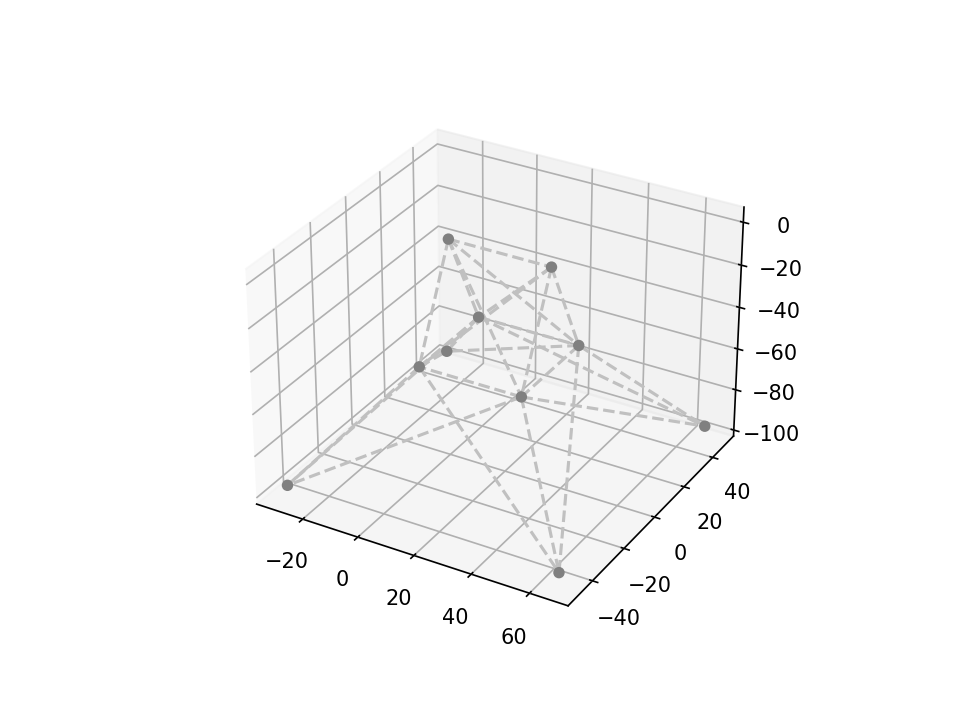

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nodes_coords[:,0], nodes_coords[:,1], nodes_coords[:,2], alpha=1, color="#808080")

for element in range(1,26):
    a,b,_,_,_,_,_,_,_,_ = data.loc[element].values.tolist()
    x = [nodes_coords[int(a)-1,0], nodes_coords[int(b)-1,0]]
    y = [nodes_coords[int(a)-1,1], nodes_coords[int(b)-1,1]]
    z = [nodes_coords[int(a)-1,2], nodes_coords[int(b)-1,2]]
    ax.plot(x, y, z, linestyle="--", color='#C0C0C0')
    
plt.show()

In [13]:
#ploting deformed
def_nodes_coords = nodes_coords.copy()
for i in range(6):
    def_nodes_coords[i] = nodes_coords[i] + np.reshape(U[(3*i):(3*i+3)], (1,3))
print(def_nodes_coords)

[[-3.46526641e-08  2.80241767e-01 -3.06989153e-06]
 [ 3.60000000e+01  2.80241767e-01 -3.06989153e-06]
 [-2.04015255e-03  1.80184409e+01 -4.80598043e+01]
 [ 3.60020402e+01  1.80184409e+01 -4.80598043e+01]
 [ 3.59979596e+01 -1.79815588e+01 -4.79402018e+01]
 [ 2.04039182e-03 -1.79815588e+01 -4.79402018e+01]
 [-3.00000000e+01  4.80000000e+01 -9.60000000e+01]
 [ 6.60000000e+01  4.80000000e+01 -9.60000000e+01]
 [ 6.60000000e+01 -4.80000000e+01 -9.60000000e+01]
 [-3.00000000e+01 -4.80000000e+01 -9.60000000e+01]]


In [14]:
print(def_nodes_coords - nodes_coords)

[[-3.46526641e-08  2.80241767e-01 -3.06989153e-06]
 [ 3.46526647e-08  2.80241767e-01 -3.06989153e-06]
 [-2.04015255e-03  1.84409105e-02 -5.98042593e-02]
 [ 2.04015255e-03  1.84409105e-02 -5.98042593e-02]
 [-2.04039182e-03  1.84411502e-02  5.97981760e-02]
 [ 2.04039182e-03  1.84411502e-02  5.97981760e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


<IPython.core.display.Javascript object>


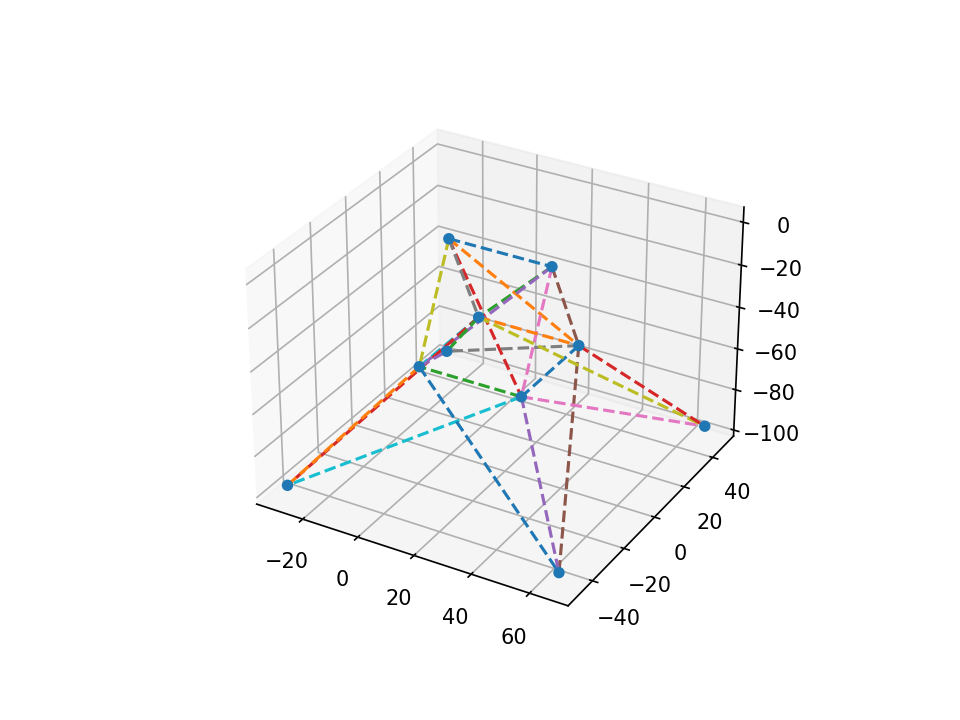

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(def_nodes_coords[:,0], def_nodes_coords[:,1], def_nodes_coords[:,2], alpha=1)

for element in range(1,26):
    a,b,_,_,_,_,_,_,_,_ = data.loc[element].values.tolist()
    x = [def_nodes_coords[int(a)-1,0], def_nodes_coords[int(b)-1,0]]
    y = [def_nodes_coords[int(a)-1,1], def_nodes_coords[int(b)-1,1]]
    z = [def_nodes_coords[int(a)-1,2], def_nodes_coords[int(b)-1,2]]
    ax.plot(x, y, z, linestyle="--")
    
plt.show()

<IPython.core.display.Javascript object>


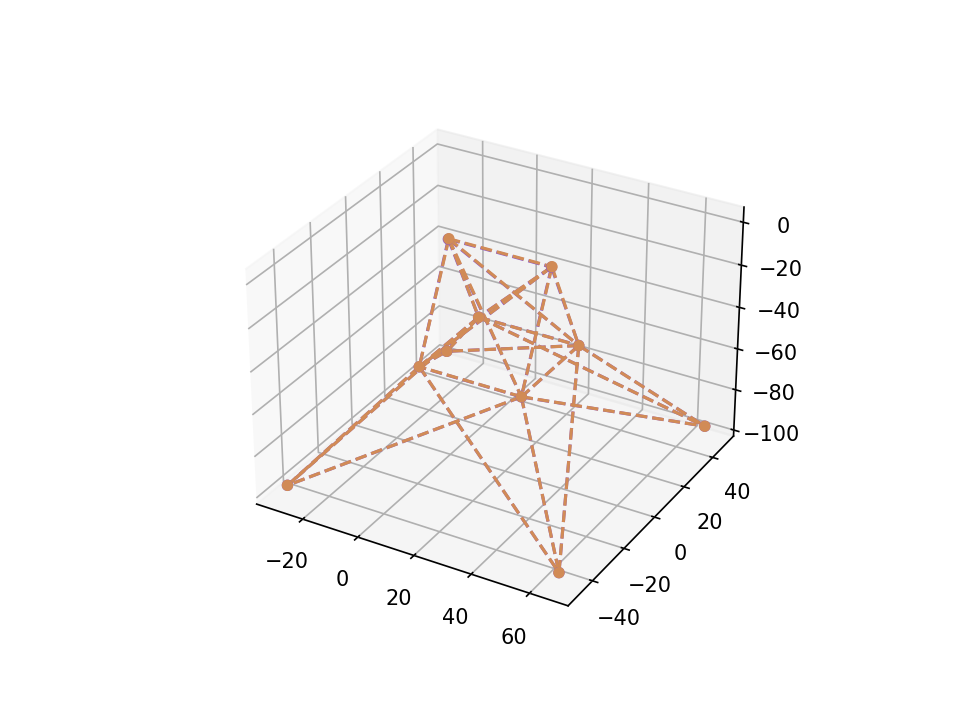

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nodes_coords[:,0], nodes_coords[:,1], nodes_coords[:,2], alpha=1, color='#8956d1')

for element in range(1,26):
    a,b,_,_,_,_,_,_,_,_ = data.loc[element].values.tolist()
    x = [nodes_coords[int(a)-1,0], nodes_coords[int(b)-1,0]]
    y = [nodes_coords[int(a)-1,1], nodes_coords[int(b)-1,1]]
    z = [nodes_coords[int(a)-1,2], nodes_coords[int(b)-1,2]]
    ax.plot(x, y, z, linestyle="--", color='#8956d1')
    
ax.scatter(def_nodes_coords[:,0], def_nodes_coords[:,1], def_nodes_coords[:,2], alpha=1, color="#d18b56")

for element in range(1,26):
    a,b,_,_,_,_,_,_,_,_ = data.loc[element].values.tolist()
    x = [def_nodes_coords[int(a)-1,0], def_nodes_coords[int(b)-1,0]]
    y = [def_nodes_coords[int(a)-1,1], def_nodes_coords[int(b)-1,1]]
    z = [def_nodes_coords[int(a)-1,2], def_nodes_coords[int(b)-1,2]]
    ax.plot(x, y, z, linestyle="--", color='#d18b56')
      
plt.show()